#  Decision tree for classification

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

### 1) Reading of the processed dataset

In [89]:
X_train = pd.read_csv("/workspaces/ML-Decision-Tree-PilarZarco/data/processed/X_train.csv")
y_train = pd.read_csv("/workspaces/ML-Decision-Tree-PilarZarco/data/processed/y_train.csv")

X_test = pd.read_csv("/workspaces/ML-Decision-Tree-PilarZarco/data/processed/X_test.csv")
y_test = pd.read_csv("/workspaces/ML-Decision-Tree-PilarZarco/data/processed/y_test.csv")

df = pd.read_csv("/workspaces/ML-Decision-Tree-PilarZarco/data/raw/diabete.csv")

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,106,56,27,165,29.0,0.426,22
1,1,89,66,23,94,28.1,0.167,21
2,1,116,78,29,180,36.1,0.496,25
3,6,115,60,39,0,33.7,0.245,40
4,5,136,82,0,0,0.0,0.640,69


In [90]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,112,75,32,0,35.7,0.148,21
1,2,128,64,42,0,40.0,1.101,24
2,1,119,44,47,63,35.5,0.280,25
3,1,100,66,15,56,23.6,0.666,26
4,4,141,74,0,0,27.6,0.244,40


In [91]:
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)


Dimensiones de X_train: (614, 8)
Dimensiones de y_train: (614, 1)


In [92]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


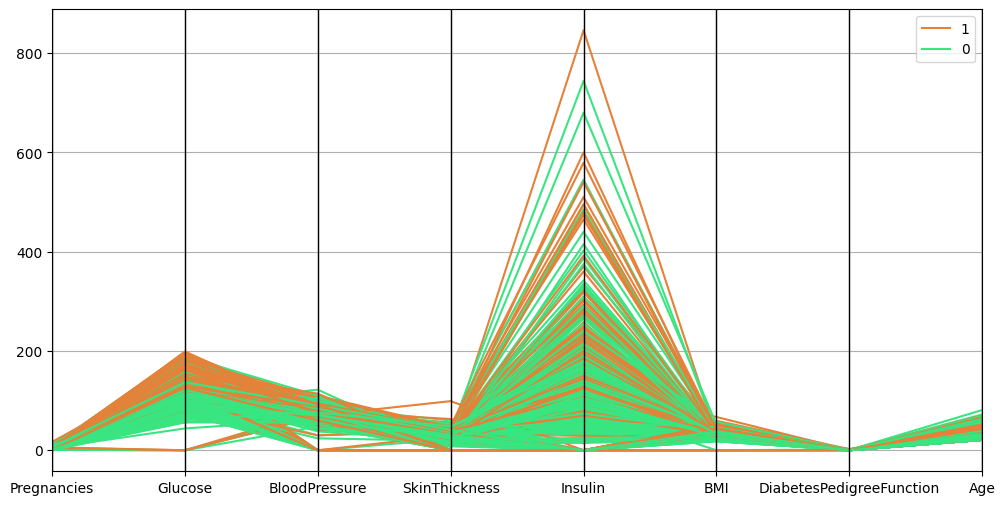

In [93]:
# Relationship of the variables with the target
df.drop("Unnamed: 0", axis=1, inplace=True)
plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(df, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

### 2) Model initialisation and training

In [94]:
# Create and train the decision tree model

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 71)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=71)

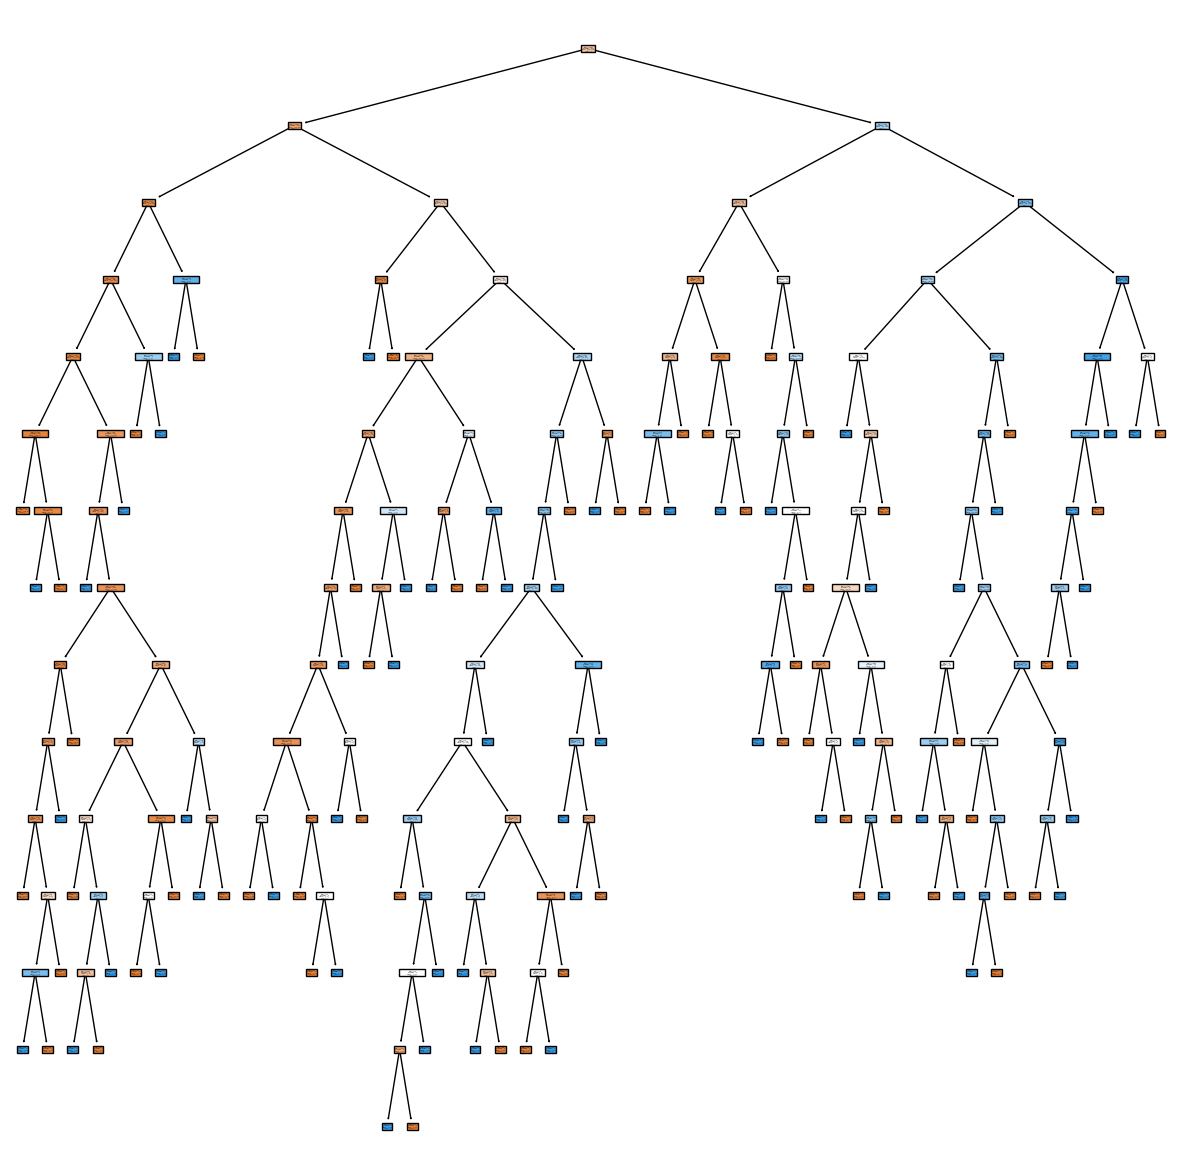

In [95]:
# Visualise the decision tree
from sklearn import tree

fig = plt.figure(figsize=(15, 15))
tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

### 3) Model prediction

In [96]:
# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [97]:
# model accuracy in the test set
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7012987012987013

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 5}],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=71),
             param_grid={'class_weight': [None, 'balanced', {0: 1, 1: 2},
                                          {0: 1, 1: 5}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'max_features': [None, 'sqrt', 'log2', 0.5, 0.7],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [99]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [100]:
model = DecisionTreeClassifier(class_weight= None, criterion = 'entropy', max_depth = 5, max_features= None, min_samples_leaf = 4, min_samples_split = 20, random_state = 11)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=20, random_state=11)

In [101]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [102]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7337662337662337

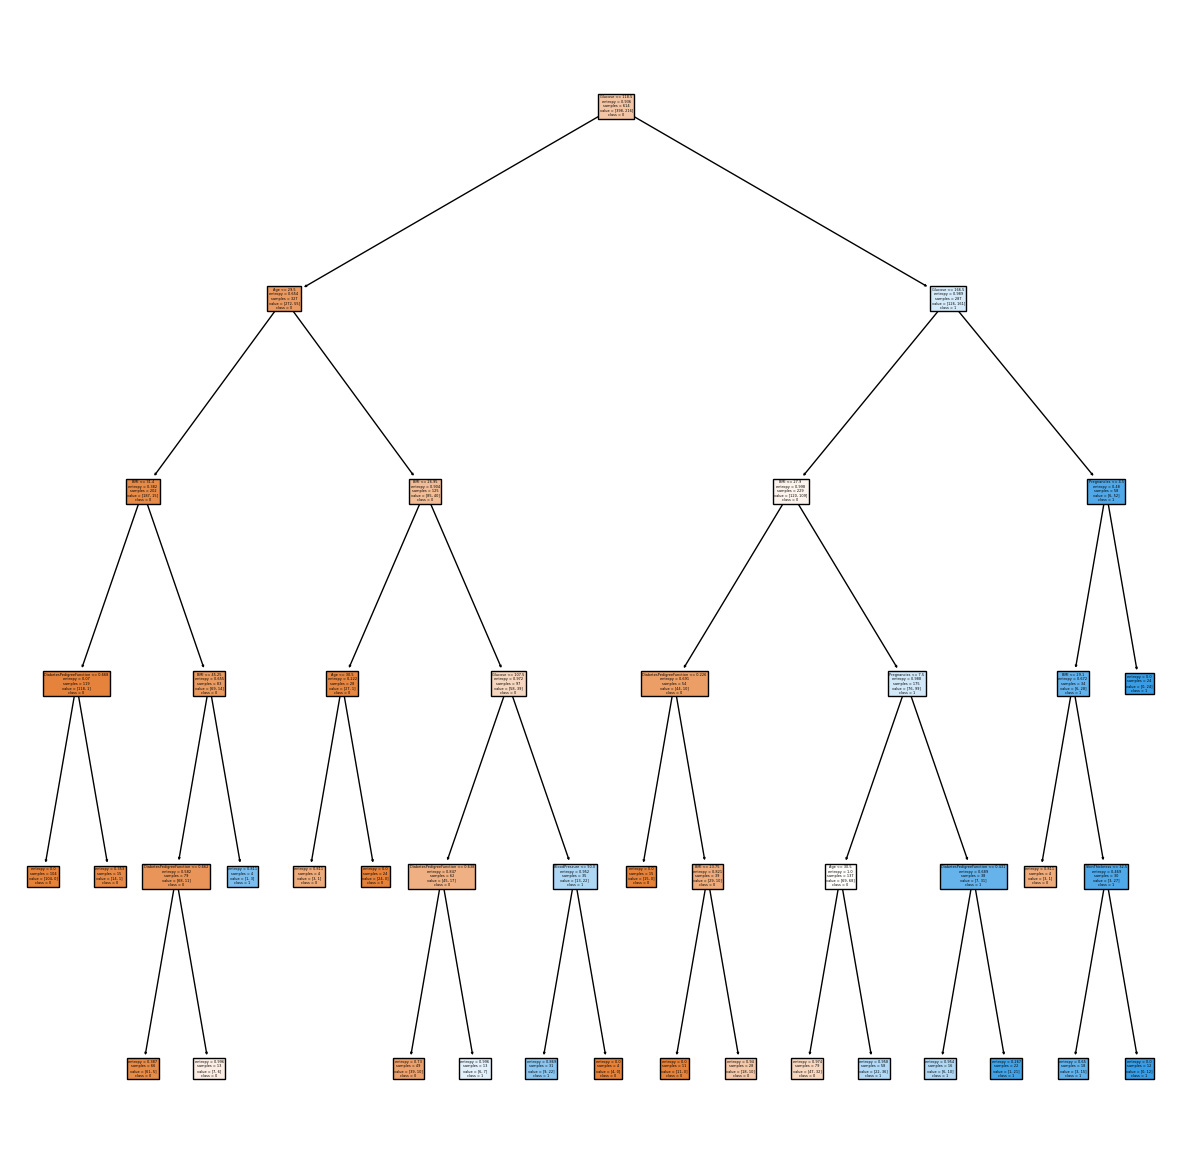

In [103]:
fig = plt.figure(figsize=(15, 15))
tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [104]:
# save trained model
from pickle import dump

dump(model, open("/workspaces/ML-Decision-Tree-PilarZarco/models/decision_tree_classifier_default_71.sav", "wb"))